<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Power_Transformer(31).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing some dependencies :--

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [90]:
concrete=pd.read_csv("concrete_data.csv")

In [91]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [92]:
concrete.shape

(1030, 9)

In [93]:
concrete.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [94]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [95]:
X=concrete.drop(columns=["Strength"])
Y=concrete.iloc[:,-1]

In [96]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [97]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Applying Linear Regression without any transformer :--

In [99]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

y_pred=LR.predict(X_test)

print("R2 score : ",r2_score(Y_test,y_pred))

R2 score :  0.627553179231485


##lets check the r2 score with cross validation:

In [100]:
LR=LinearRegression()
np.mean(cross_val_score(LR,X ,Y ,scoring='r2' ))

0.46099404916628606

##ploting the distplot without any transformer :--

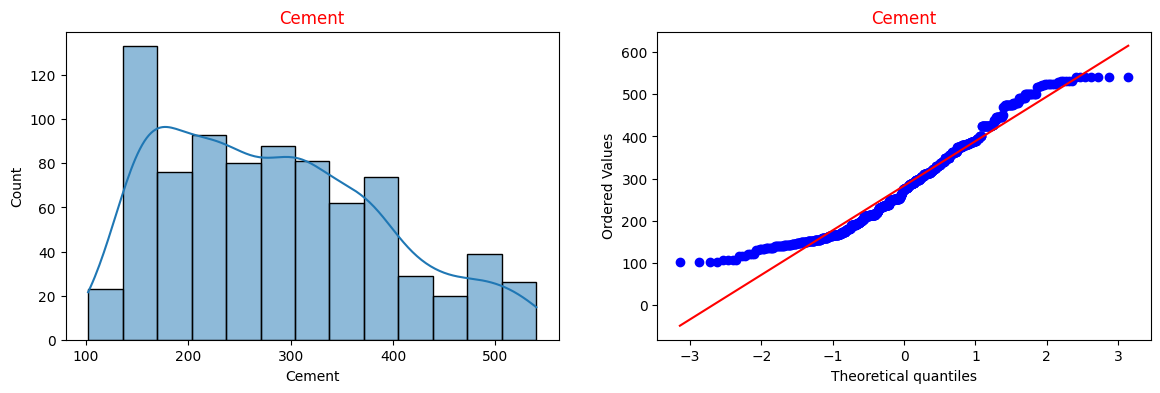

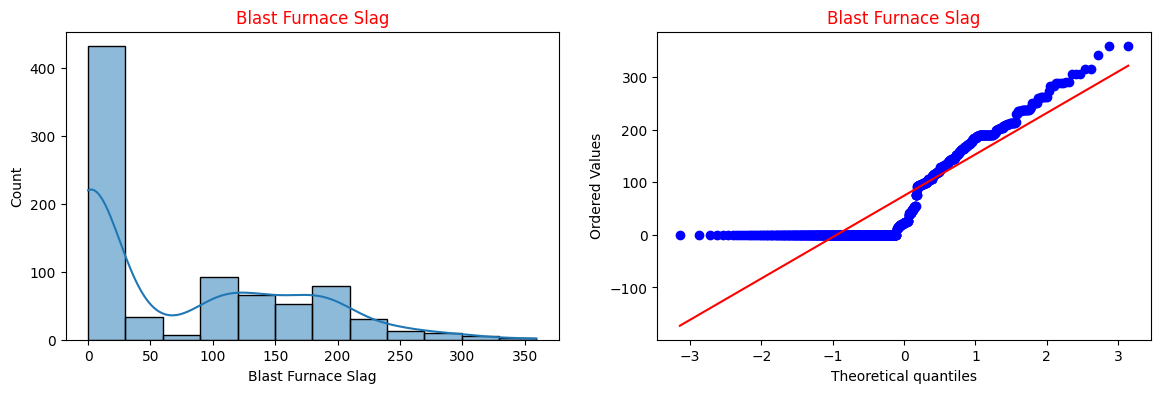

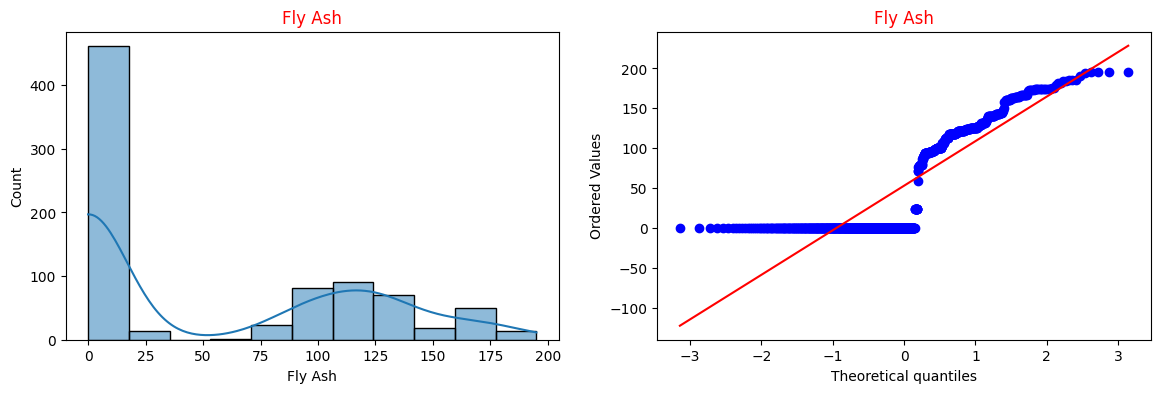

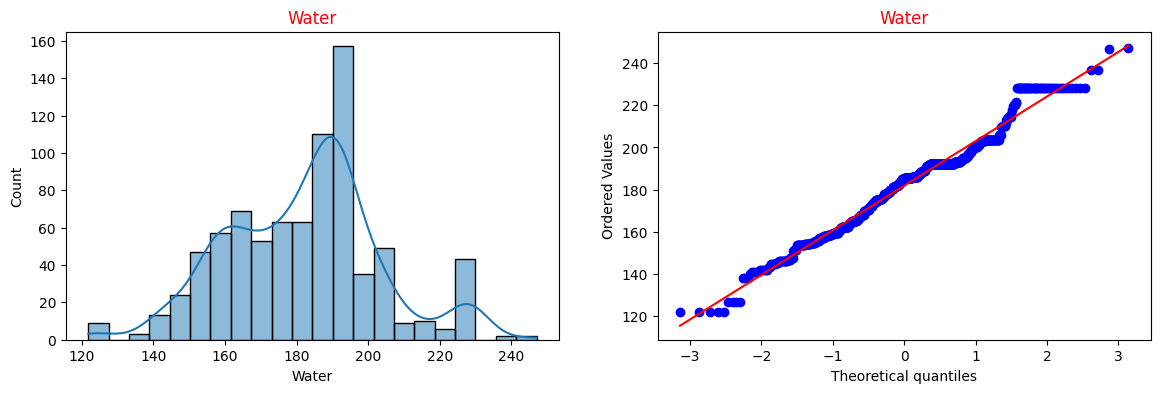

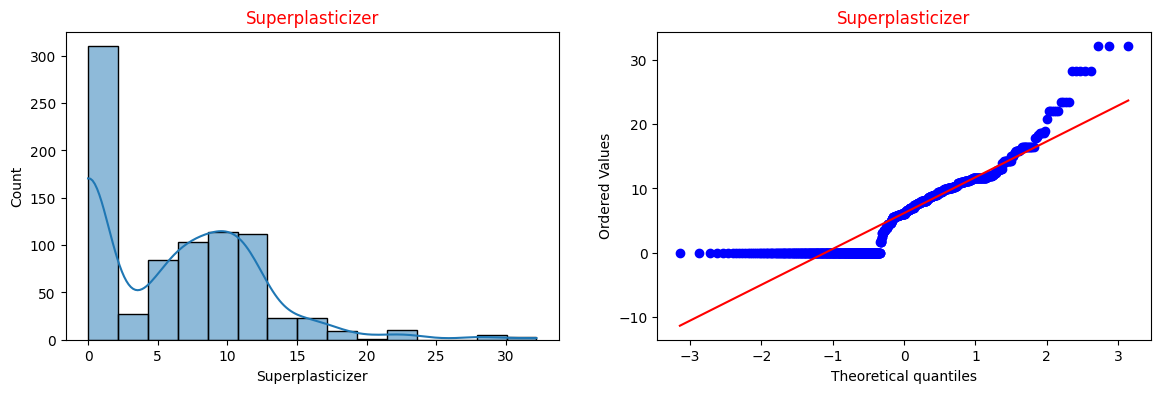

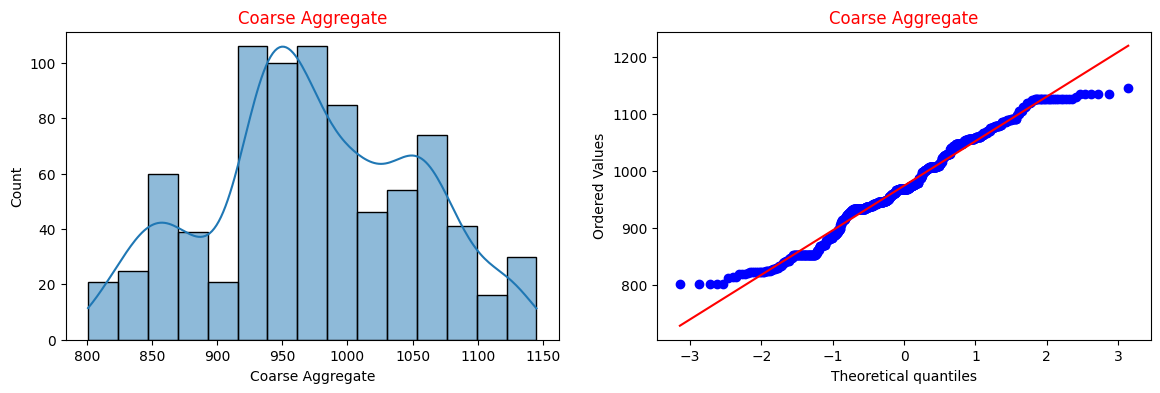

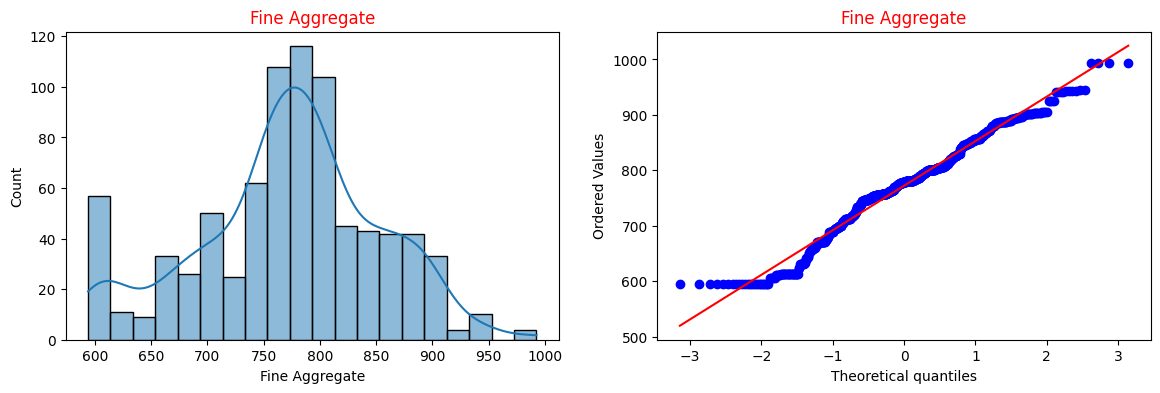

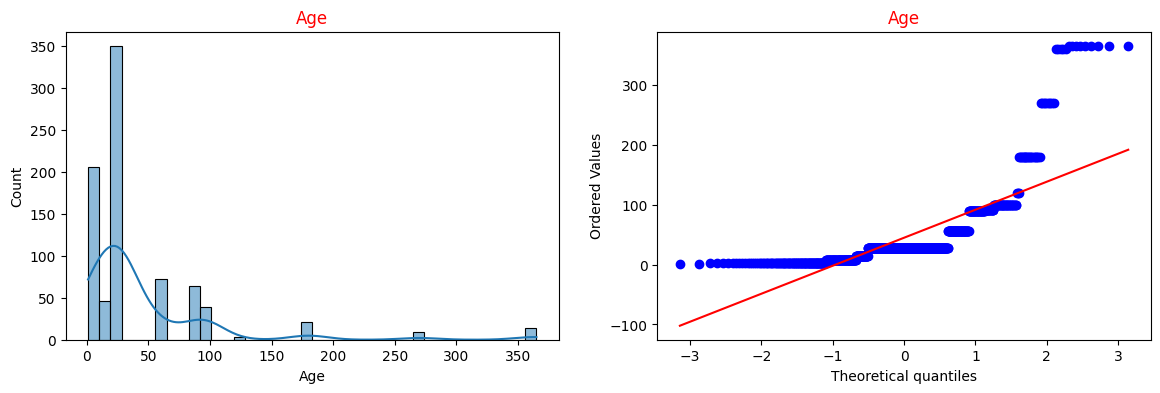

In [101]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train,x=X_train[col] ,kde=True)
    plt.title(col ,color="red")

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col,color="red")

    plt.show()

##Applying Box-cox transform :--

In [102]:
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train + 0.0000001)
X_test_transformed=pt.transform(X_test + 0.00000001)

pd.DataFrame({"columns" :X_train.columns ,"Box-Cox lambdas":pt.lambdas_})

,columns,Box-Cox lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772681
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


#Applying Linear Regression on transformed data :--

In [103]:
LR=LinearRegression()
LR.fit(X_train_transformed,Y_train)

y_pred=LR.predict(X_test_transformed)

print("R2 score : ",r2_score(Y_test,y_pred))

R2 score :  0.7990844926482943


##lets check the r2 score with cross validation:--



In [104]:
pt=PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(X + 0.0000001)

LR=LinearRegression()
np.mean(cross_val_score(LR,X_transformed ,Y ,scoring='r2' ))

0.6658537942219863

In [105]:
X_transformed

array([[ 1.9942716 , -1.08685375, -0.90528496, ...,  0.86216079,
        -1.20848963,  0.11185503],
       [ 1.9942716 , -1.08685375, -0.90528496, ...,  1.05711395,
        -1.20848963,  0.11185503],
       [ 0.60739887,  0.94736522, -0.90528496, ..., -0.53049757,
        -2.0857501 ,  2.14547951],
       ...,
       [-1.45632706,  0.94468921,  1.10093378, ..., -1.03605728,
         0.03769698,  0.11185503],
       [-1.29079247,  0.98034528, -0.90528496, ...,  0.20980301,
         0.15117183,  0.11185503],
       [-0.04388168,  0.90503985,  1.07779322, ..., -1.39051823,
        -0.1947544 ,  0.11185503]])

#distplot before and after of Box-Cox transform :--

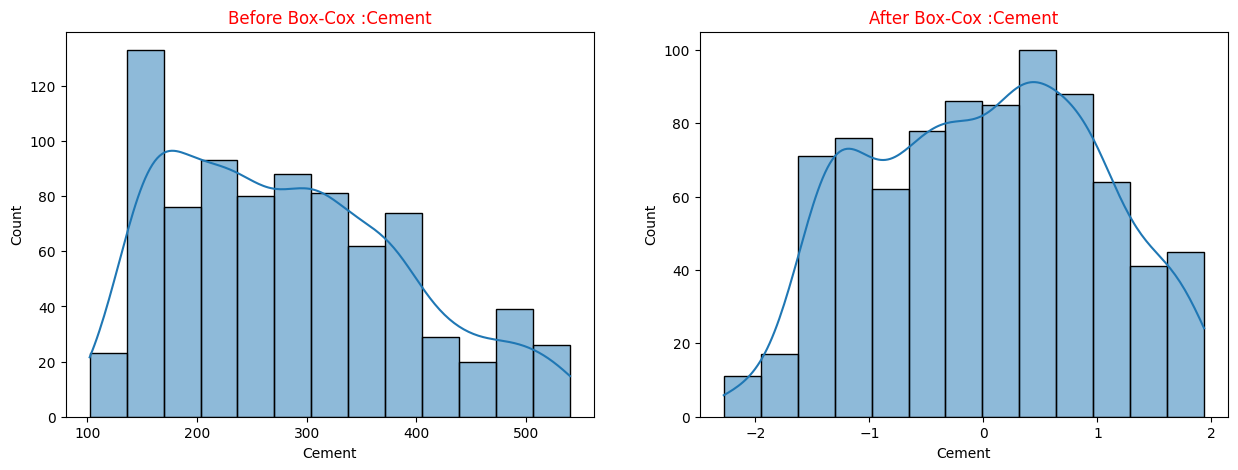

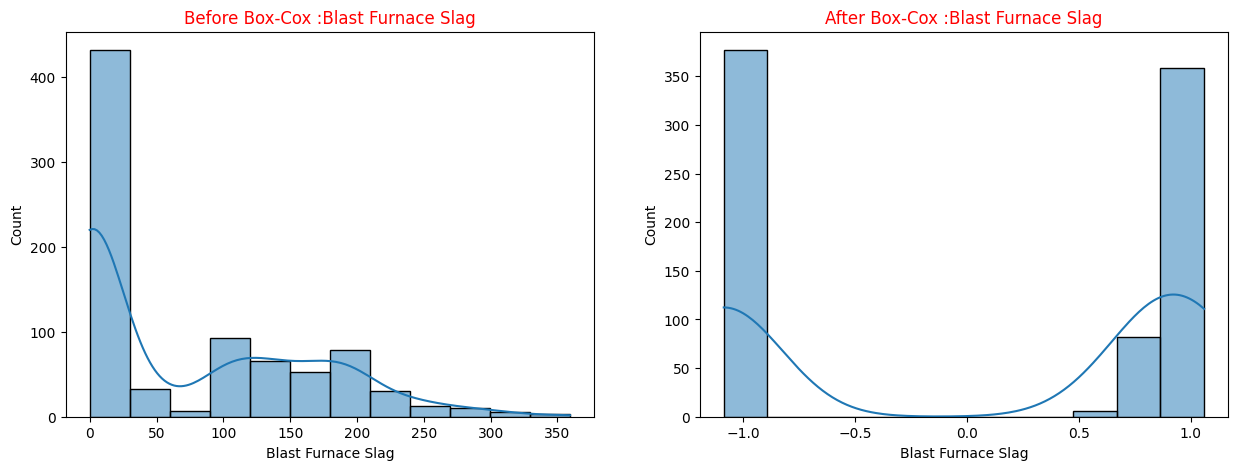

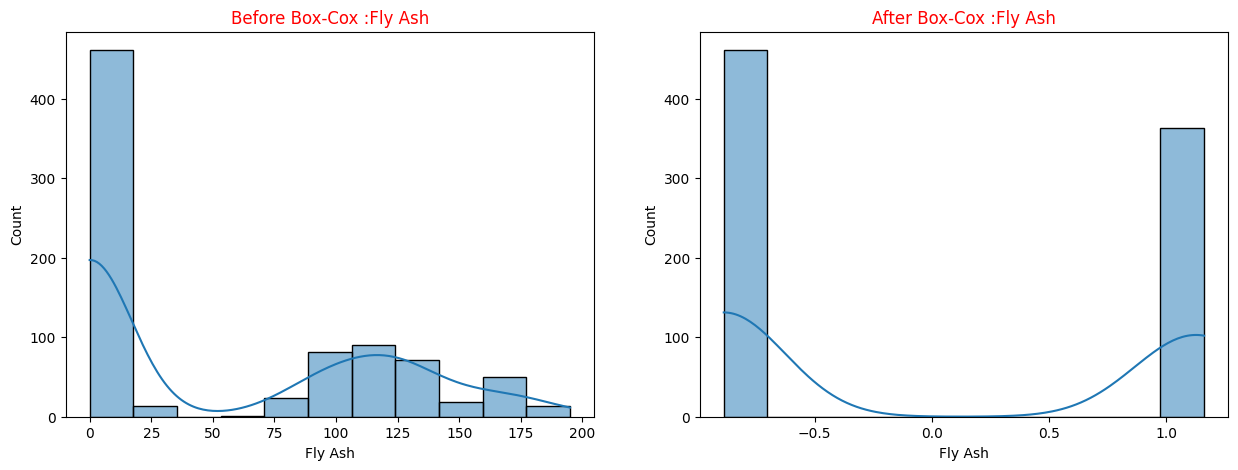

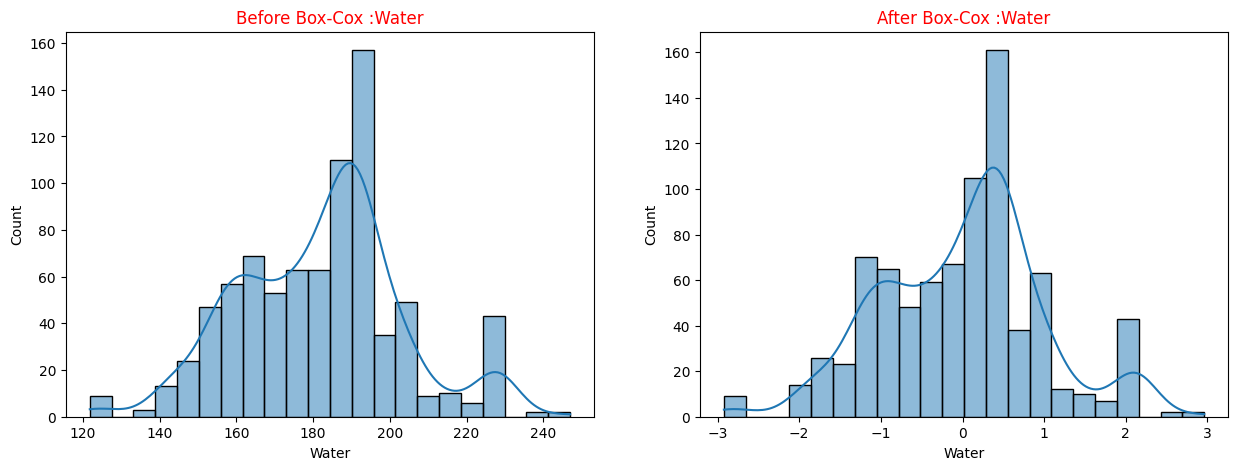

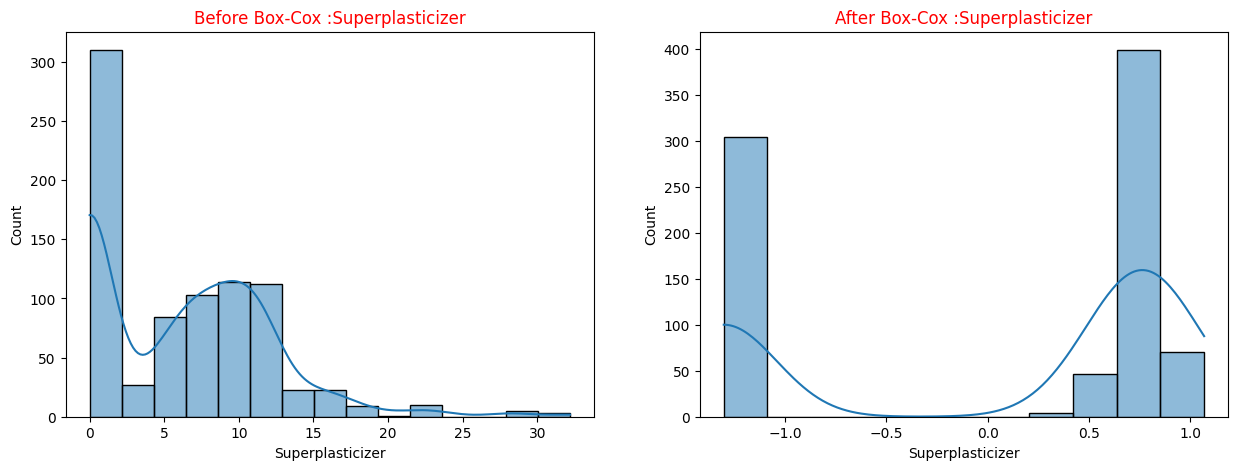

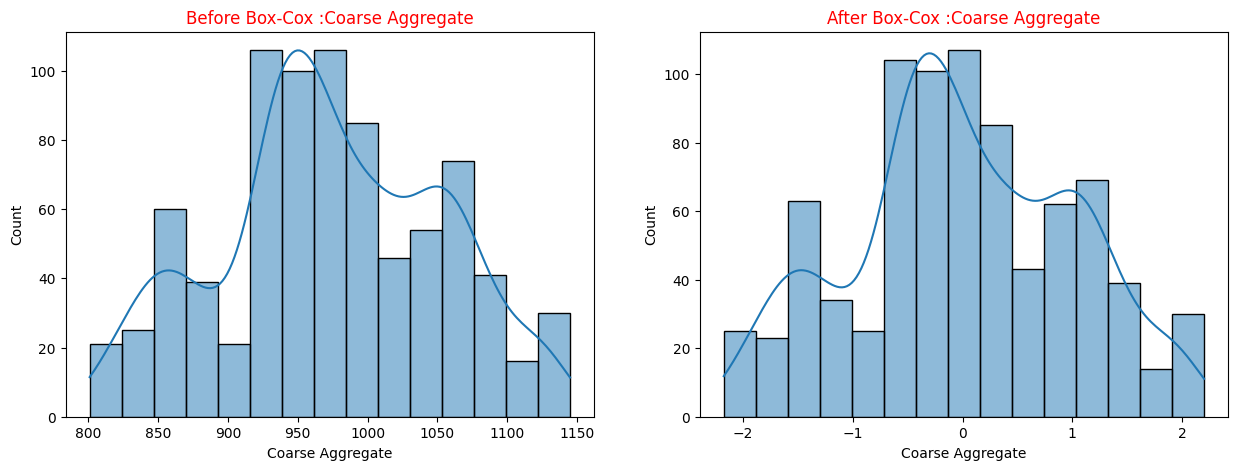

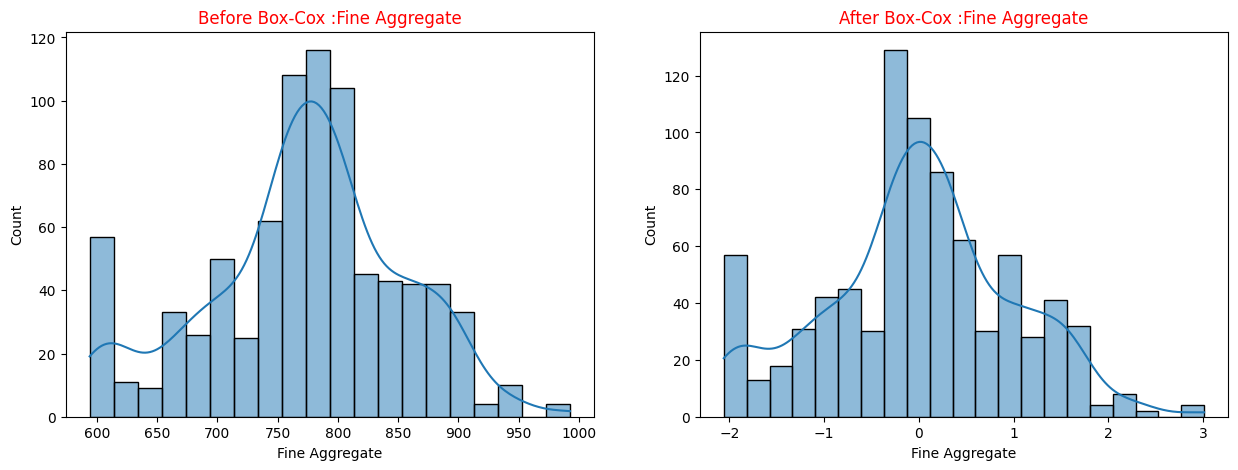

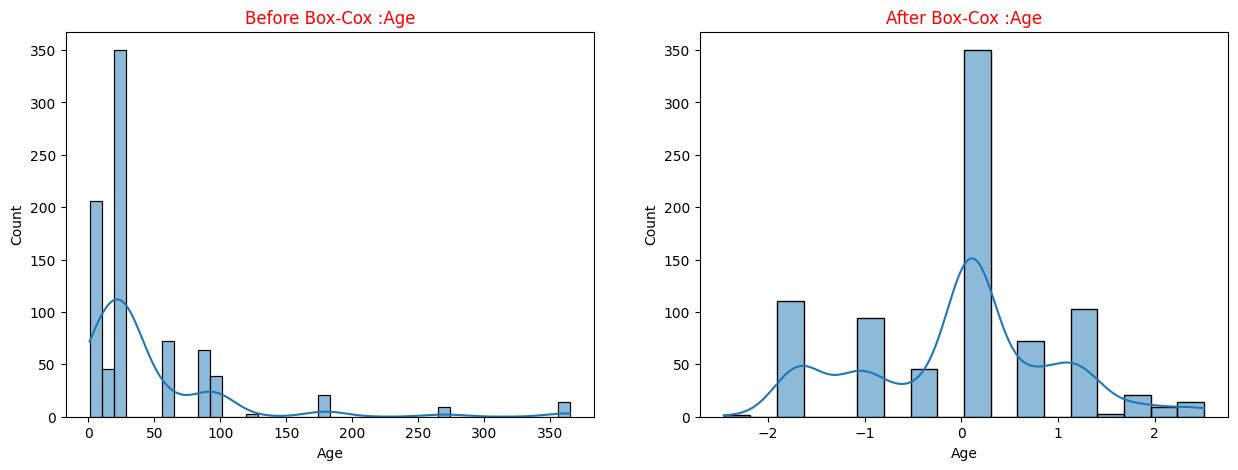

In [106]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for column in X_train.columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.histplot(X_train ,x=X_train[column] , kde=True)
  plt.title(f"Before Box-Cox :{column}",color="red")

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed ,x=X_train_transformed[column] , kde=True)
  plt.title(f"After Box-Cox :{column}",color="red")

#applying Yeo-Jhonson transform:--

In [107]:
pt1=PowerTransformer()  #since yeo-jhonson is by default method
X_train_transformed=pt1.fit_transform(X_train )
X_test_transformed=pt1.transform(X_test )

pd.DataFrame({"columns" :X_train.columns ,"yeo-johnson lambdas":pt1.lambdas_})

,columns,yeo-johnson lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


#Applying Linear Regression on transformed data :--

In [108]:
LR=LinearRegression()
LR.fit(X_train_transformed,Y_train)

y_pred=LR.predict(X_test_transformed)

print("R2 score : ",r2_score(Y_test,y_pred))

R2 score :  0.8161906512004999


##lets check the r2 score with cross validation:--

In [110]:
pt1=PowerTransformer()
X_transformed=pt1.fit_transform(X )

LR=LinearRegression()
np.mean(cross_val_score(LR,X_transformed ,Y ,scoring='r2' ))

0.6834625141500866

#distplot before and after of Yeo-Johnson transform :--

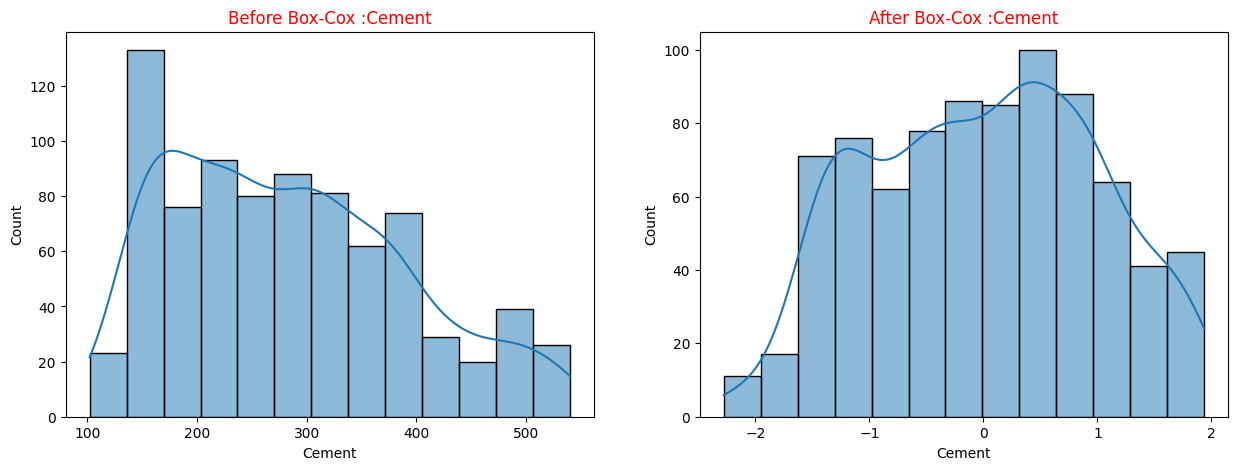

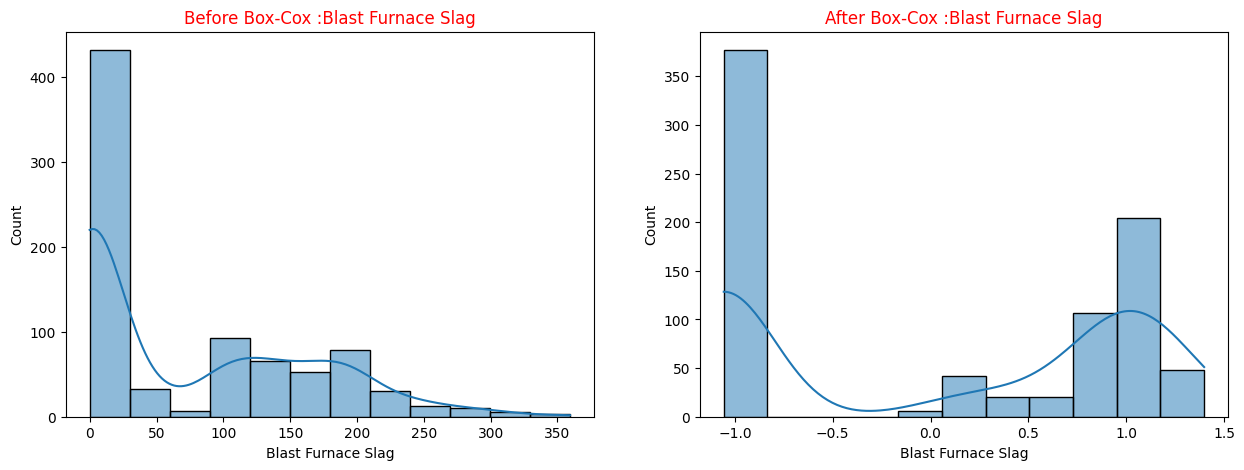

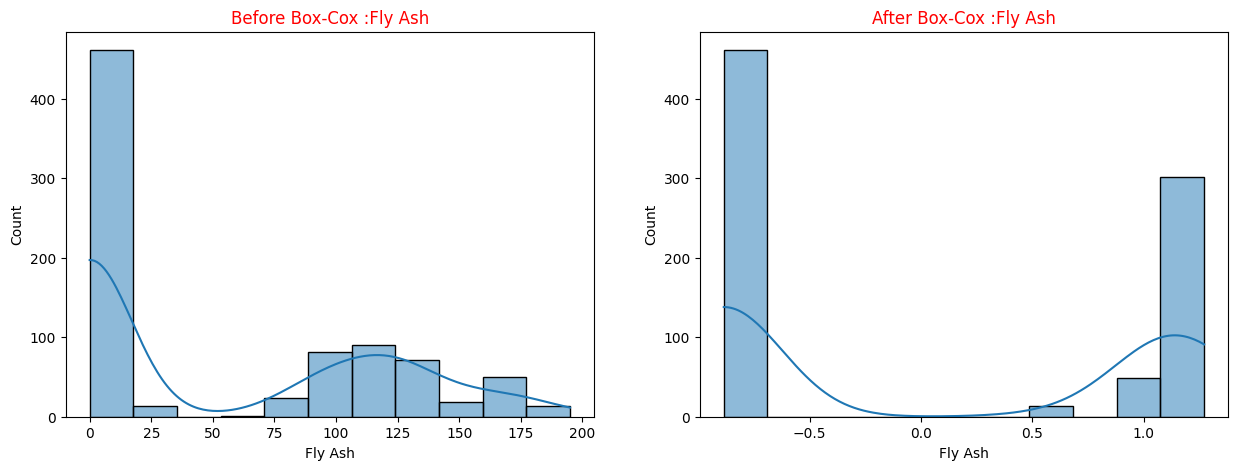

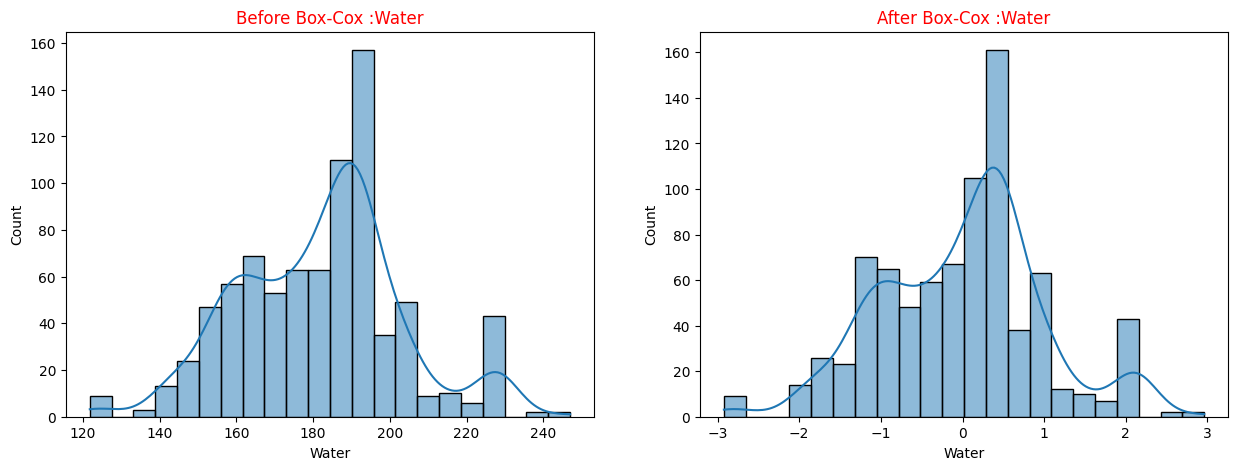

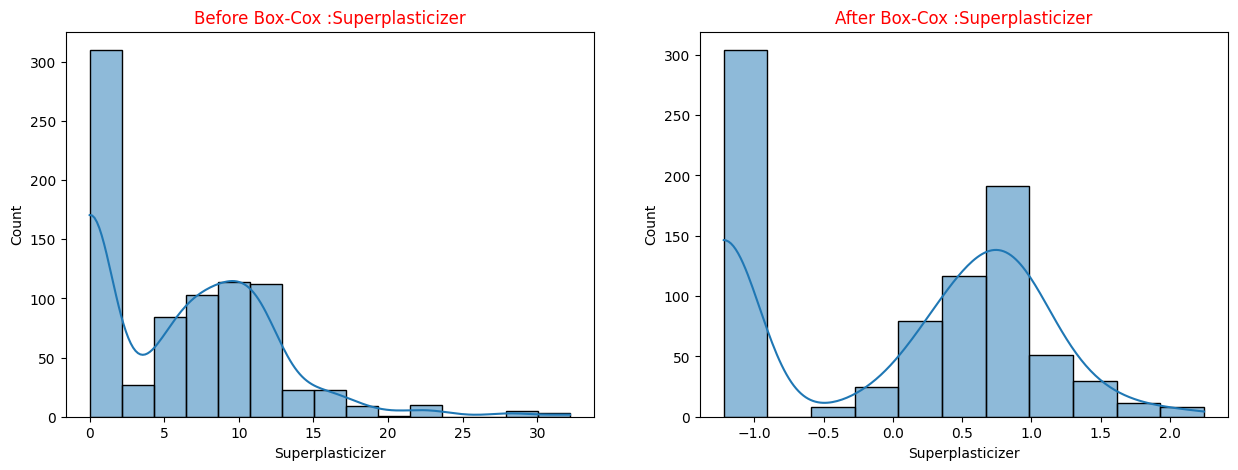

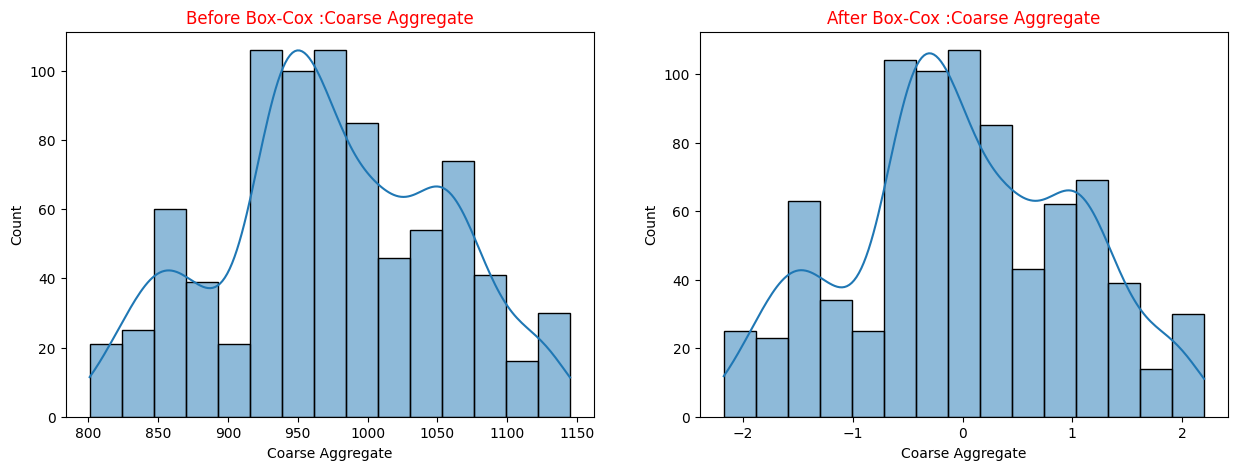

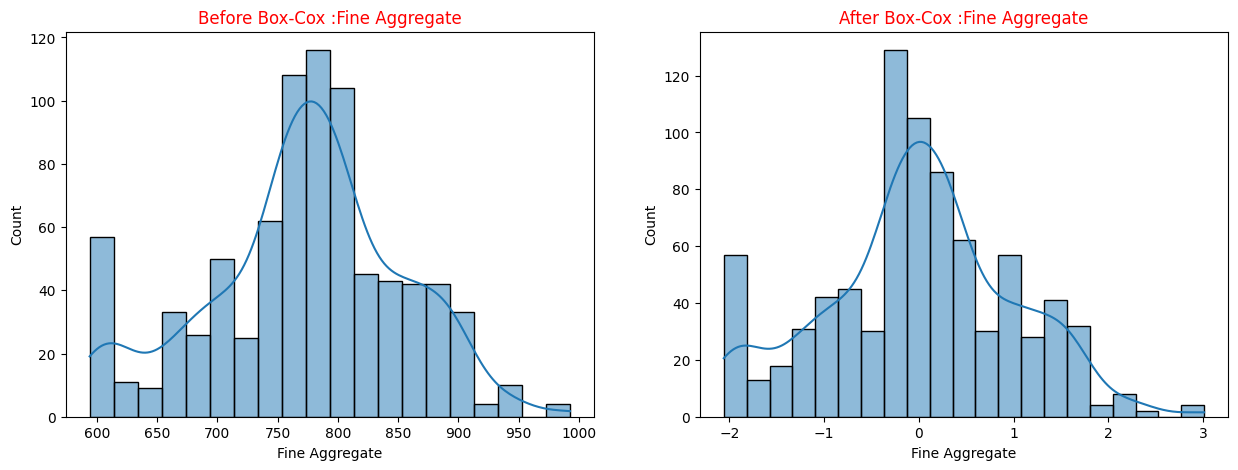

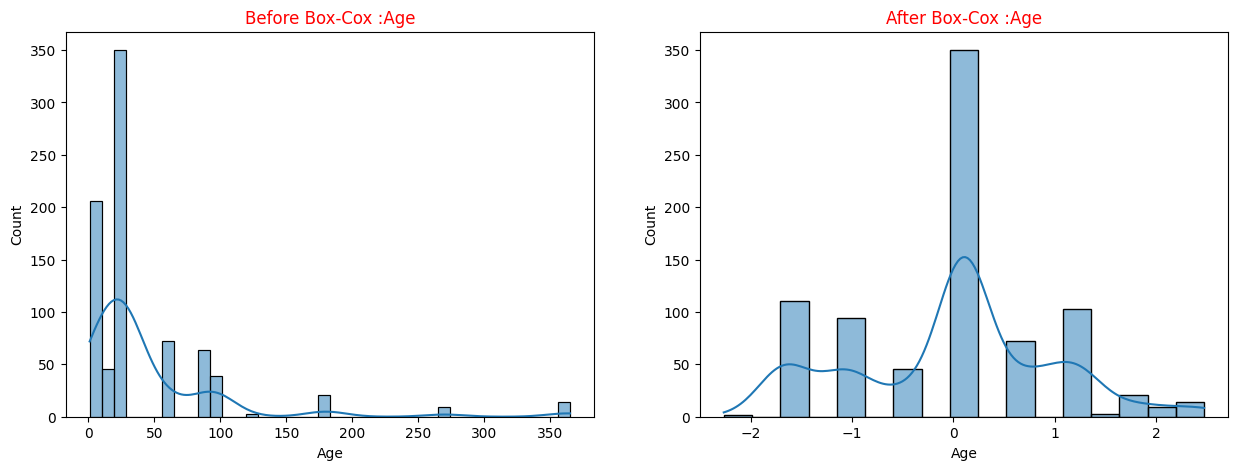

In [111]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
for column in X_train.columns:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.histplot(X_train ,x=X_train[column] , kde=True)
  plt.title(f"Before Box-Cox :{column}",color="red")

  plt.subplot(1,2,2)
  sns.histplot(X_train_transformed ,x=X_train_transformed[column] , kde=True)
  plt.title(f"After Box-Cox :{column}",color="red")

#Comparing the box-cox lambdas and yeo-johnson lambdas :-

In [112]:
pd.DataFrame({"columns" :X_train.columns ,"Box-Cox lambdas":pt.lambdas_ ,"yeo-johnson lambdas":pt1.lambdas_})

,columns,Box-Cox lambdas,yeo-johnson lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.022924,0.016633
2,Fly Ash,-0.028797,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.087911,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
